
# Objective/problem:
  A developer interest in acquiring properties in King County Washington He wants to know what home features (zip code, structure, and so on) would yield a high price. We have acquired the king county sold housing data from 2014 ~ 2015. It has 21613 records with 21 features.   By using this data set, we are going to answer this developer's question.  Eg: Which zip code/house structure will help him make the most money.
  
Data set location: https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/kc_house_data.csv

Input variables definition:
  1. ID : unique id for each home sold.
  2. Date : Date of the home sold.
  3. Price: price of the home sold.
  4. Bedrooms : number of bedrooms.
  5. Bathrooms : number of bathroom, where .5 accounts for a room with a tolilet
     with no shower.
  6. Sqft_living: square footage of the interior living space.
  7. Sqft_lot : square footage of the lot size.
  8. Floors: number of floors.
  9. Waterfront: a numeric variable to indicate if the house overlooking the  
     water front.  1-yes, 0-no.
  10. View: a numeric from 0 to 4 of how good the view of the property was.
  11. Condition: a numeric from 1 to 5 on the condition of the house.
  12. Grade: a numberic from 1 to 13. 1-3 is consider 'bad', 7 is average  
      level,and 11-13 have a high level of quality.
  13. Sqft_above: The square footage of the interior living space that is above 
      ground level.
  14. Sqft_basement: the squre footage of the interrior living space that is
      below ground level.
  15. Yr_build: The year the house was initially built.
  16. Yr_renovated: The year the house was initially built.
  17. Zipcode: The zipcode area the house is in.
  18. Lat: Lattitude
  19. Long: Longitude
  20. Sqft_living15: The square footage of interior living space for the 15 
      nearest neighbors.
  21. Sqft_lot15: The square footage of the lots of the nearest 15 neighbors.
  
Methods and Approach:
  
  1.  Assuming the building cost are the same thru king county. The higher the price per sqft, The more profit for the developer.  We will find the zipcodes that has higher price per sqft.
  2. Some floors/structure produced more sqft than the others. Targeting those types of structure will yield high price and hence higher profit.
  3. bedrooms and bathrooms also important factors in terms of housing prices.  We will do som analysis to see how these features affect price as well as other features.

In [1]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load data
filename = 'https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/kc_house_data.csv'
house_df = pd.read_csv(filename)

# Data exploration start here...

In [3]:
house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


##### Observation: The mean price 540k(mean) compared with median 450k(50%) has a big gap and it indicates that the data set's price is skewed to the right.

In [4]:
print(house_df.shape)
print(house_df.dtypes)

(21613, 21)
id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [5]:
#check if there is any null value in the dataset..
house_df.isnull().values.any()

False

##### Observation: there is no missing value in the data set

In [6]:
# get the unique values from these columns so we know the value of categoriese type of features, We can 
# also detech abnormal value using this technique.

column_list = {'bedrooms', 'bathrooms','floors', 'waterfront','view', 'condition','grade','zipcode'}
for column_name in column_list:
      print(column_name)      
      print(sorted(house_df[column_name].unique()))

bedrooms
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 33]
condition
[1, 2, 3, 4, 5]
view
[0, 1, 2, 3, 4]
floors
[1.0, 1.5, 2.0, 2.5, 3.0, 3.5]
waterfront
[0, 1]
grade
[1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
bathrooms
[0.0, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.25, 5.5, 5.75, 6.0, 6.25, 6.5, 6.75, 7.5, 7.75, 8.0]
zipcode
[98001, 98002, 98003, 98004, 98005, 98006, 98007, 98008, 98010, 98011, 98014, 98019, 98022, 98023, 98024, 98027, 98028, 98029, 98030, 98031, 98032, 98033, 98034, 98038, 98039, 98040, 98042, 98045, 98052, 98053, 98055, 98056, 98058, 98059, 98065, 98070, 98072, 98074, 98075, 98077, 98092, 98102, 98103, 98105, 98106, 98107, 98108, 98109, 98112, 98115, 98116, 98117, 98118, 98119, 98122, 98125, 98126, 98133, 98136, 98144, 98146, 98148, 98155, 98166, 98168, 98177, 98178, 98188, 98198, 98199]


##### Observation: "33 bedrooms" could be a typo error, Let's remove it from the data set so it won't skew the data.


In [7]:
house_df.drop(house_df[house_df.bedrooms == 33].index, inplace=True)

In [8]:
#remove the outliers for sold homes that are not in the range of +/-3 std 
# of price

pricestd  = house_df['price'].std()
house_df[abs(house_df.price-house_df.price.mean()) < pricestd*3] 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [9]:
# Let's consolidate bath into "1,2,3,4,5,6,7,8" categories 
house_df['bath'] = house_df['bathrooms']
house_df['bath'] = house_df['bath'].astype(str)
house_df['bath']=np.where(house_df['bath'] =='0.0' , '1', house_df['bath'])
house_df['bath']=np.where(house_df['bath'] =='0.5' , '1', house_df['bath'])
house_df['bath']=np.where(house_df['bath'] =='0.75' , '1', house_df['bath'])
house_df['bath']=np.where(house_df['bath'] =='1.0' , '1', house_df['bath'])

house_df['bath']=np.where(house_df['bath'] == '1.25' , '2', house_df['bath'])
house_df['bath']=np.where(house_df['bath'] == '1.5' , '2', house_df['bath'])
house_df['bath']=np.where(house_df['bath'] == '1.75' , '2', house_df['bath'])
house_df['bath']=np.where(house_df['bath'] == '2.0' , '2', house_df['bath'])

house_df['bath']=np.where(house_df['bath'] == '2.25' , '3', house_df['bath'])
house_df['bath']=np.where(house_df['bath'] == '2.5' , '3', house_df['bath'])
house_df['bath']=np.where(house_df['bath'] == '2.75' , '3', house_df['bath'])
house_df['bath']=np.where(house_df['bath'] == '3.0' , '3', house_df['bath'])

house_df['bath']=np.where(house_df['bath'] == '3.25' , '4', house_df['bath'])
house_df['bath']=np.where(house_df['bath'] == '3.5' , '4', house_df['bath'])
house_df['bath']=np.where(house_df['bath'] == '3.75' , '4', house_df['bath'])
house_df['bath']=np.where(house_df['bath'] == '4.0' , '4', house_df['bath'])

house_df['bath']=np.where(house_df['bath'] == '4.25' , '5', house_df['bath'])
house_df['bath']=np.where(house_df['bath'] == '4.5' , '5', house_df['bath'])
house_df['bath']=np.where(house_df['bath'] == '4.75' , '5', house_df['bath'])
house_df['bath']=np.where(house_df['bath'] == '5.0' , '5', house_df['bath'])

house_df['bath']=np.where(house_df['bath'] == '5.25' , '6', house_df['bath'])
house_df['bath']=np.where(house_df['bath'] == '5.5' , '6', house_df['bath'])
house_df['bath']=np.where(house_df['bath'] == '5.75' , '6', house_df['bath'])
house_df['bath']=np.where(house_df['bath'] == '6.0' , '6', house_df['bath'])

house_df['bath']=np.where(house_df['bath'] == '6.25' , '7', house_df['bath'])
house_df['bath']=np.where(house_df['bath'] == '6.5' , '7', house_df['bath'])
house_df['bath']=np.where(house_df['bath'] == '6.75' , '7', house_df['bath'])

house_df['bath']=np.where(house_df['bath'] == '7.5' , '8', house_df['bath'])
house_df['bath']=np.where(house_df['bath'] == '7.75' , '8', house_df['bath'])
house_df['bath']=np.where(house_df['bath'] == '8.0' , '8', house_df['bath'])

In [10]:
#Create a new column to indicate if the house being remodeled. 
#he new column is "renovated"

house_df['renovated'] = house_df['yr_renovated']
house_df['renovated'] = house_df['renovated'].astype(str)
house_df['renovated']=np.where(house_df['renovated'] != '0' , '1', '0')


In [11]:
# create an helper new colomn for the counts 
house_df['counts'] = 1

In [12]:
#Create a new column "age" to store the age of the house
house_df['age'] = 2017 - house_df['yr_built']

In [13]:
#Create new columns "sold_year" and "sold_month" to store the sold year/month value of a house.

house_df['sold_year']= house_df['date']
house_df['sold_year'].astype(str)
house_df['sold_year']=house_df['sold_year'].map(lambda x: str(x)[:4])

house_df['sold_month']= house_df['date']
house_df['sold_month'].astype(str)
house_df['sold_month']=house_df['sold_month'].map(lambda x: str(x)[:6])
house_df['sold_month']=house_df['sold_month'].map(lambda x: str(x)[4:])

In [14]:
# create a new column that have the price per sqft "price_per_sqft"

house_df['price_per_sqft']=house_df['price'] / house_df['sqft_living']

In [72]:
#print(house_df.head(10))

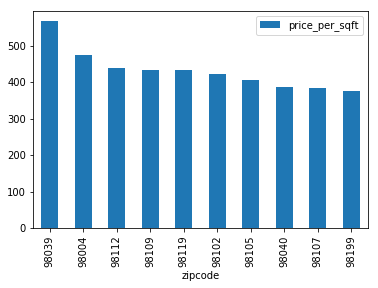

In [15]:
# create a chart to have the top 10 zipcodes that has pricist per sqrt
cols=['zipcode','price_per_sqft']
my_house_df=house_df.loc[:, cols]
temp=my_house_df.groupby('zipcode').mean()

mytemp=temp.sort_values(by=('price_per_sqft'),ascending=False).head(10)
mytemp.plot.bar()


##### Observation: The chart above are the top 10 zipcodes that has the pricest per sqft.

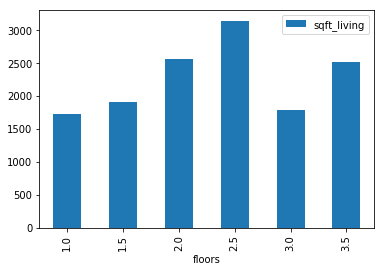

In [16]:
# create a chart to see which type of "floors" has most sqrt ...

cols=['sqft_living','floors']
my_house_df=house_df.loc[:, cols]
my_house_df.groupby('floors').mean().plot.bar()

##### Observation: building with 2.5 floors produce the most sqft living space


In [17]:
# Lets check out which months are the months that has most buyers looking to buy..

house_df[['counts', 'sold_year', 'sold_month']].groupby(['sold_year', 'sold_month']).agg('count')


counts
sold_year sold_month        
2014      05            1768
          06            2179
          07            2211
          08            1940
          09            1774
          10            1878
          11            1411
          12            1471
2015      01             978
          02            1250
          03            1875
          04            2231
          05             646

##### Observation: between May 2014 ~ May 2015, the hottest months to sell the houses are April June, and July.  The slowest month is Jan 2015.

In [18]:
# let's check out which zipcodes sold the most units of house during this peiod..

temp=house_df[['counts','zipcode']].groupby(['zipcode']).agg('count')
temp.sort_values(by=('counts'),ascending=False).head(10)

,counts
zipcode,
98103,601
98038,590
98115,583
98052,574
98117,553
98042,548
98034,545
98118,508
98023,499


##### Observation: The top 10 zipcodes that has the highest sold count numbers

In [19]:
# use some of the strong correlation features to see what are 
# the 10 most expansive and 10 least expansive zipcodes in king county

cols=['price','bedrooms','bathrooms','floors', 'sqft_living', 'sqft_lot', 'sqft_basement', 'zipcode','renovated']
my_house_df=house_df.loc[:, cols]
temp=my_house_df.groupby('zipcode').mean()
temp.sort_values(by=('price'),ascending=False).head(10)
#temp.sort_values(by=('price')).head(10)

,price,bedrooms,bathrooms,floors,sqft_living,sqft_lot,sqft_basement
zipcode,,,,,,,
98039,2.160607e+06,4.060000,3.200000,1.560000,3800.900000,17403.560000,510.000000
98004,1.355927e+06,3.854890,2.527603,1.432177,2909.022082,13104.220820,489.179811
98040,1.194230e+06,4.028369,2.716312,1.505319,3106.833333,13704.464539,632.503546
98112,1.095499e+06,3.509294,2.373606,1.806691,2498.743494,4990.431227,493.048327
98102,9.012583e+05,3.219048,2.261905,2.004762,2159.742857,3616.190476,394.809524
98109,8.796236e+05,3.192661,2.158257,1.729358,2054.779817,3621.082569,417.431193
98105,8.628252e+05,3.580786,2.159389,1.591703,2150.576419,5121.165939,457.117904
98006,8.596848e+05,3.841365,2.555723,1.459839,2888.295181,13383.435743,587.911647
98119,8.494480e+05,3.260870,2.224185,1.793478,2005.614130,3615.217391,415.652174


##### Observation: The most expansive zipcode is "98039" with the highest mean price above 2 million dollars

In [20]:
# let's find out what are the cheapest zipcodes in king county during this period.

temp.sort_values(by=('price')).head(10)

,price,bedrooms,bathrooms,floors,sqft_living,sqft_lot,sqft_basement
zipcode,,,,,,,
98002,234284.035176,3.326633,1.839196,1.334171,1627.743719,7517.633166,105.206030
98168,240328.371747,2.996283,1.433086,1.159851,1468.624535,11269.843866,234.535316
98032,251296.240000,3.392000,1.708000,1.220000,1738.048000,10379.760000,303.728000
98001,280804.690608,3.383978,2.006215,1.429558,1900.856354,14937.450276,179.530387
98148,284908.596491,3.140351,1.793860,1.210526,1610.526316,8960.719298,124.035088
98023,286732.791583,3.424850,2.061623,1.323647,1989.729459,10470.208417,283.955912
98188,289078.345588,3.433824,1.863971,1.227941,1802.772059,10126.080882,310.617647
98003,294111.278571,3.357143,2.047321,1.310714,1928.882143,10603.096429,265.332143
98030,296187.980469,3.500000,2.162109,1.503906,1962.500000,11778.734375,158.437500


##### Observation: The least expansiive zipcode is "98002" with the lowest mean price of ~234k

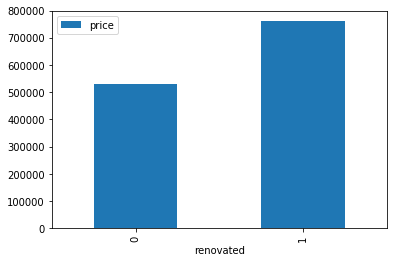

In [21]:
# How does the houses ronovated v.s. non-ronovated..

cols=['price','renovated']
my_house_df=house_df.loc[:, cols]
my_house_df.groupby('renovated').mean().plot.bar()

##### Observation: The mean price is around 750k for renovated houses while 500k for the non-renovated houses.

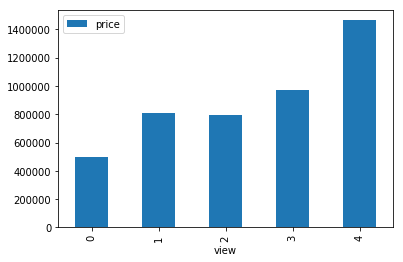

In [22]:
# how does view affect price?

cols=['price','view']
my_house_df=house_df.loc[:, cols]
my_house_df.groupby('view').mean().plot.bar()

##### Observation: The trend observed here is dramatically increasing in price when view has value of 4.

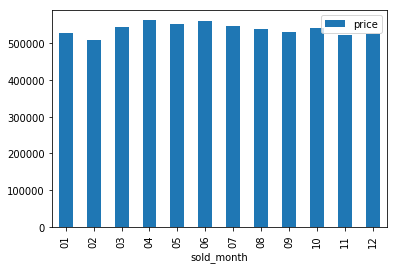

In [23]:
# what are the mean prices in each month?

cols=['price','sold_month']
my_house_df=house_df.loc[:, cols]
my_house_df.groupby('sold_month').mean().plot.bar()

##### Observation: The month of April has the highest mean price thru the year, followed by June.

In [24]:
# get the correlationship matrix for the continuous variables for analysis
corr = house_df.corr()
corr.style.background_gradient(cmap='coolwarm')

C:\Users\Timm\Anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,counts,age,price_per_sqft
id,1,-0.0167529,0.00246103,0.00514373,-0.0122755,-0.132118,0.0184938,-0.00272418,0.0115818,-0.0237006,0.00811104,-0.0108742,-0.0051284,0.0213521,-0.0169146,-0.00820806,-0.00185869,0.0207701,-0.00293467,-0.13881,nan,-0.0213521,-0.00548633
price,-0.0167529,1,0.315445,0.525147,0.702047,0.0896639,0.256811,0.266371,0.397299,0.0363361,0.667447,0.605591,0.323812,0.0540228,0.126437,-0.0532091,0.306998,0.0216371,0.585404,0.0824512,nan,-0.0540228,0.554707
bedrooms,0.00246103,0.315445,1,0.529159,0.591467,0.032807,0.181085,-0.00661108,0.0819296,0.0254779,0.366502,0.4906,0.30949,0.159167,0.0196167,-0.157093,-0.0105407,0.133882,0.402626,0.0304023,nan,-0.159167,-0.212888
bathrooms,0.00514373,0.525147,0.529159,1,0.754663,0.0877354,0.500645,0.0637421,0.187732,-0.124946,0.664979,0.685339,0.283789,0.506012,0.0507347,-0.203858,0.0245938,0.223028,0.568628,0.0871695,nan,-0.506012,-0.0913982
sqft_living,-0.0122755,0.702047,0.591467,0.754663,1,0.172822,0.353937,0.103816,0.284606,-0.0587044,0.762701,0.876597,0.435065,0.318037,0.0553584,-0.199421,0.0525522,0.240209,0.756419,0.18328,nan,-0.318037,-0.0922902
sqft_lot,-0.132118,0.0896639,0.032807,0.0877354,0.172822,1,-0.00521041,0.0216028,0.0747072,-0.00893463,0.113616,0.183507,0.015293,0.0530729,0.00764138,-0.129571,-0.0856752,0.229516,0.144602,0.718556,nan,-0.0530729,-0.0338109
floors,0.0184938,0.256811,0.181085,0.500645,0.353937,-0.00521041,1,0.0236951,0.0294315,-0.263706,0.458171,0.523866,-0.245684,0.489302,0.00632963,-0.0591022,0.0496551,0.125388,0.279856,-0.0112819,nan,-0.489302,0.00389042
waterfront,-0.00272418,0.266371,-0.00661108,0.0637421,0.103816,0.0216028,0.0236951,1,0.401857,0.0166653,0.0827733,0.0720723,0.0805914,-0.0261648,0.0928841,0.0302868,-0.0142703,-0.0419142,0.0864611,0.0307022,nan,0.0261648,0.193226
view,0.0115818,0.397299,0.0819296,0.187732,0.284606,0.0747072,0.0294315,0.401857,1,0.0460308,0.251315,0.16764,0.276959,-0.0534524,0.103915,0.0848342,0.00616991,-0.0784129,0.280432,0.0725707,nan,0.0534524,0.220957
condition,-0.0237006,0.0363361,0.0254779,-0.124946,-0.0587044,-0.00893463,-0.263706,0.0166653,0.0460308,1,-0.144632,-0.158136,0.174057,-0.36138,-0.0606025,0.00297298,-0.0150477,-0.106423,-0.0927307,-0.00337257,nan,0.36138,0.102228


##### Observation: From the matrix above, we can see there are high positive corrlationship between price and sqft_living(0.702047), grade (0.667447), bathrooms(0.525147).  
##### There are some low positive corrlationship between price and bedrooms (0.315445), floors (0.256811), water_front (0.266371), views (0.397299) and lat (0.306998).

Text(0.5, 1.0, 'price vs. condition \n with waterfront by color')

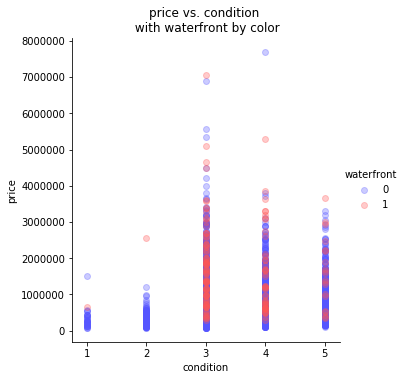

In [26]:
# how does grade, waterfront and condition affect the price..
import seaborn as sns
cols=['price','grade','waterfront','condition']
my_house_df=house_df.loc[:, cols]

sns.lmplot(x = 'condition', y = 'price', 
           data = my_house_df, 
           hue = "waterfront", 
           palette="seismic", 
           scatter_kws={'alpha':0.3},
           fit_reg = False)
plt.xlabel('condition')
plt.ylabel('price')
plt.title('price vs. condition \n with waterfront by color')

##### Observation: more waterfront feature clustered at condition 3 , 4, 5

Text(0.5, 1.0, 'price vs. sqft_living \n with bathrooms by color')

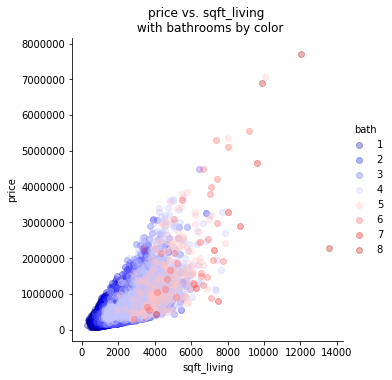

In [27]:
#Let's look at how sqft_living, bath count affect the price..
import seaborn as sns
sns.lmplot(x = 'sqft_living', y = 'price', 
           data = house_df, 
           hue = "bath", 
           palette="seismic", 
           scatter_kws={'alpha':0.3},    
           fit_reg = False)
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.title('price vs. sqft_living \n with bathrooms by color')

##### Observation: sqft_living of ~ 1500 start to have 3 bathrooms and sqft_living of ~ 3000 start to have ~5+ bath

C:\Users\Timm\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


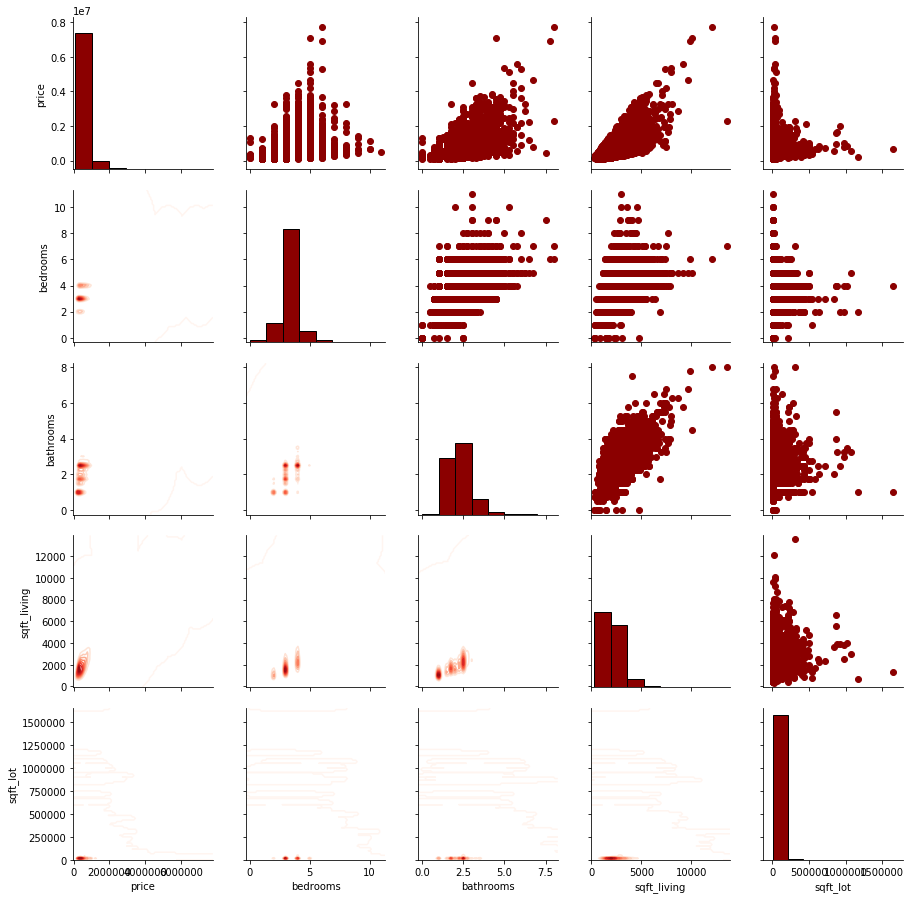

In [28]:
# Let's look at how price, bedrooms, bathrooms, sqft_living,and sqft_lot correlated
# to each others...
# this plot takes a while to run thru..

import seaborn as sns

cols=['price','bedrooms','bathrooms','sqft_living','sqft_lot']
my_house_df=house_df.loc[:, cols]

grid = sns.PairGrid(data= house_df,
                    vars = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot'])
                    
                   
grid = grid.map_upper(plt.scatter, color = 'darkred')
grid = grid.map_diag(plt.hist, bins = 8, color = 'darkred', 
                     edgecolor = 'k')
grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')

C:\Users\Timm\Anaconda3\lib\site-packages\statsmodels\nonparametric\kernels.py:128: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
C:\Users\Timm\Anaconda3\lib\site-packages\statsmodels\nonparametric\kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
C:\Users\Timm\Anaconda3\lib\site-packages\statsmodels\nonparametric\_kernel_base.py:513: RuntimeWarning: invalid value encountered in true_divide
  dens = Kval.prod(axis=1) / np.prod(bw[iscontinuous])
C:\Users\Timm\Anaconda3\lib\site-packages\matplotlib\contour.py:1557: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Users\Timm\Anaconda3\lib\site-packages\matplotlib\contour.py:1558: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
C:\Users\Timm\Anaconda3\lib\site-packages\matplotlib\conto

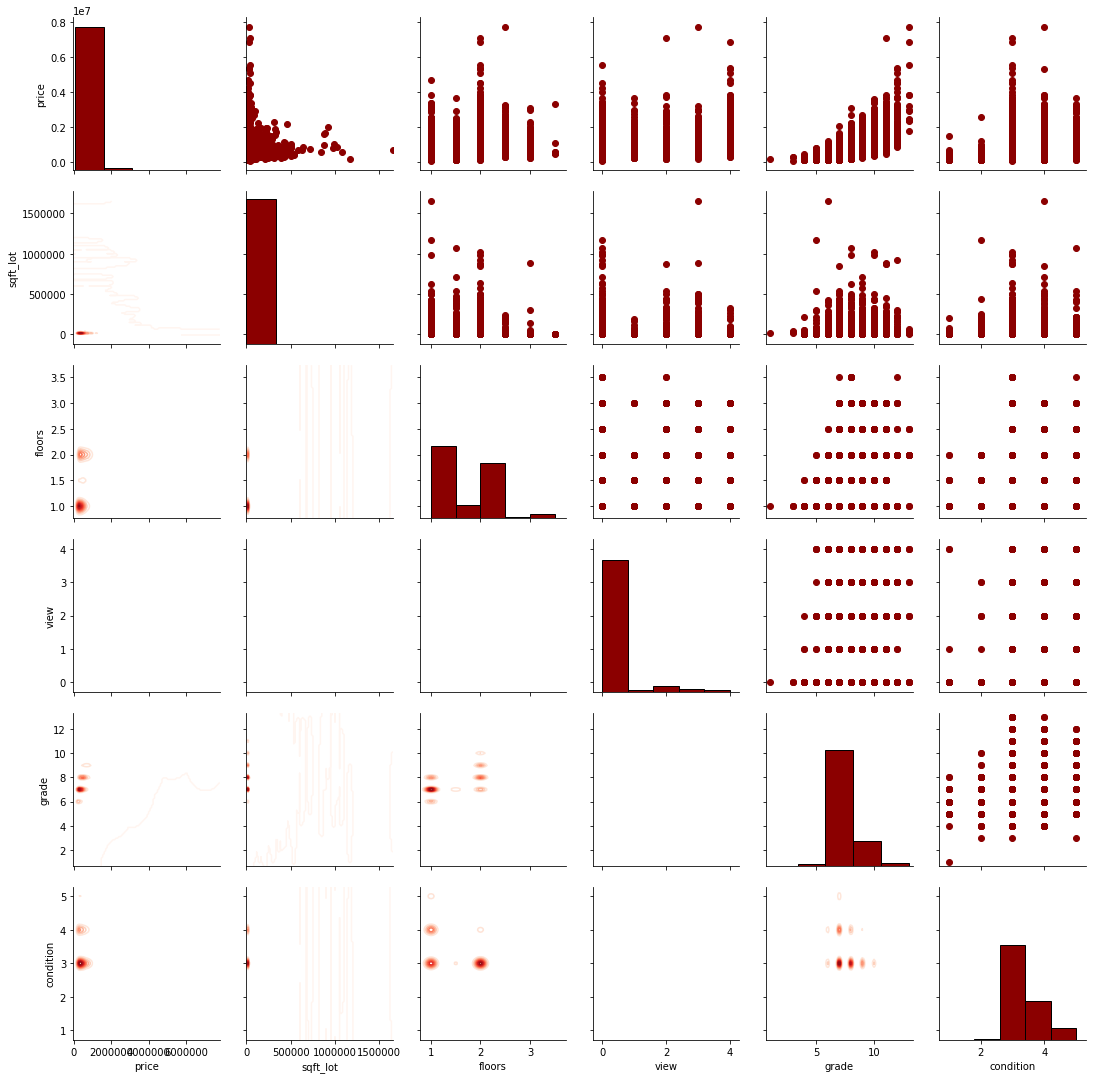

In [29]:
# this plot takes a while to run thru..

import seaborn as sns

grid = sns.PairGrid(data= house_df,
                    vars = ['price', 'sqft_lot', 'floors', 'view', 'grade', 'condition'])
grid = grid.map_upper(plt.scatter, color = 'darkred')
grid = grid.map_diag(plt.hist, bins = 5, color = 'darkred', 
                     edgecolor = 'k')
grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')

##### Observation: There seems a linear relationship between price and grade.

Summary points for developers:
    1. To get a high price, it is better to pick the zip codes that has higher price per sqft.
    2. Houses with 2.5 floors will yield more sqft than other floor types. Hence more profit.
    3. Bathrooms has strong positive correlation with price.
    4. Bedromms also has moderate positive correlation with price.
    5. Renovated houses seems to have higher price than non-renovated, if developer choose to flip a house.
    6. lot size and age of house seems has no significance with price.
    7. house with waterfront feature also has higher price for a house.